# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Albert Kabore

### Link to GitHub: https://github.com/albertokabore/Albert_Module_6_Web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [238]:
from collections import Counter
import pickle
import requests
import spacy
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing

Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [239]:

# URL of the article to scrape
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Save the parsed HTML content to a .pkl file
    with open("parsed_article.pkl", "wb") as file:
        pickle.dump(soup, file)
    print("Parsed HTML content successfully saved to 'parsed_article.pkl'")
else:
    print(f"Failed to fetch the webpage. HTTP Status Code: {response.status_code}")

Parsed HTML content successfully saved to 'parsed_article.pkl'


Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [240]:
import pickle
from bs4 import BeautifulSoup

# Loading the HTML content from the .pkl file
with open("parsed_article.pkl", "rb") as file:
    soup = pickle.load(file)

# Trying to get only the article we are after from this webpage
onlyArticle = soup.find('article')

# Check if the article was found, then extract and print the text
if onlyArticle:
    articleText = onlyArticle.get_text()
    print(articleText)
else:
    print("The <article> tag was not found in the HTML content.")



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [241]:

# Load the spacy language model
nlp = spacy.load("en_core_web_sm")

# Load the article text from the pickle file
with open("parsed_article.pkl", "rb") as file:
    soup = pickle.load(file)

# Extract and clean the article text
onlyArticle = soup.find('article')
if onlyArticle:
    articleText = onlyArticle.get_text()
else:
    print("The <article> tag was not found in the HTML content.")
    articleText = ""

# Process the article text with spaCy
doc = nlp(articleText)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each token
token_freq = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: headlight, Frequency: 11
Token: technology, Frequency: 10
Token: led, Frequency: 10


Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [242]:
# Load the spacy language model
nlp = spacy.load("en_core_web_sm")

# Load the article text from the pickle file
with open("parsed_article.pkl", "rb") as file:
    soup = pickle.load(file)

# Extract and clean the article text
onlyArticle = soup.find('article')
if onlyArticle:
    articleText = onlyArticle.get_text()
else:
    print("The <article> tag was not found in the HTML content.")
    articleText = ""

# Process the article text with spaCy
doc = nlp(articleText)

# Filter lemmas: remove punctuation, stopwords, and whitespace
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [243]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens.
    
    Args:
        sentence (str): The sentence to score.
        interesting_tokens (list of str): List of interesting tokens.
    
    Returns:
        float: The score (frequency of interesting tokens / total words).
    """
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    token_count = sum(1 for token in tokens if token in interesting_tokens)
    return token_count / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas.
    
    Args:
        sentence (str): The sentence to score.
        interesting_lemmas (list of str): List of interesting lemmas.
    
    Returns:
        float: The score (frequency of interesting lemmas / total words).
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return lemma_count / len(lemmas) if lemmas else 0

# Example to test the functions
# Use the first sentence of the article and the frequent tokens and lemmas identified in Question 3 and 4
with open("parsed_article.pkl", "rb") as file:
    soup = pickle.load(file)

# Extract the article text and split into sentences
onlyArticle = soup.find('article')
if onlyArticle:
    articleText = onlyArticle.get_text()
    first_sentence = list(nlp(articleText).sents)[0].text  # First sentence
else:
    print("The <article> tag was not found in the HTML content.")
    first_sentence = ""

# Frequent tokens and lemmas from earlier questions
frequent_tokens = ["light", "laser", "system", "beam", "headlights"]  # Example tokens
frequent_lemmas = ["light", "laser", "system", "beam", "headlight"]  # Example lemmas

# Calculate and print scores
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

print(f"First Sentence: {first_sentence}")
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

First Sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token Score: 0.15
Lemma Score: 0.1


Question 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

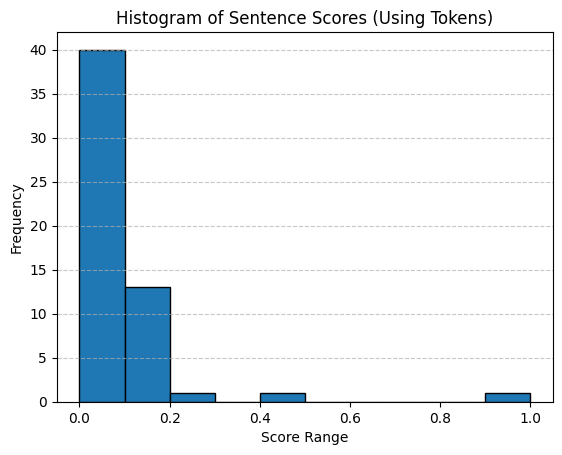

In [244]:


# Define the URL and fetch the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    article = soup.find('article').get_text()
else:
    raise Exception(f"Failed to fetch the article: {response.status_code}")

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Token Scoring Function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if len(words) == 0:
        return 0.0
    return sum(1 for word in words if word in interesting_tokens) / len(words)

# Extract sentences and calculate scores
sentences = [sent.text for sent in nlp(article).sents]
interesting_tokens = ["light", "laser", "system", "beam", "headlights"]
token_scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot the histogram
plt.hist(token_scores, bins=np.arange(0, 1.1, 0.1), edgecolor="black")
plt.title("Histogram of Sentence Scores (Using Tokens)")
plt.xlabel("Score Range")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment on the most common range
# The most common range of scores appears to be around [0.0, 0.1] based on the histogram.

Question 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

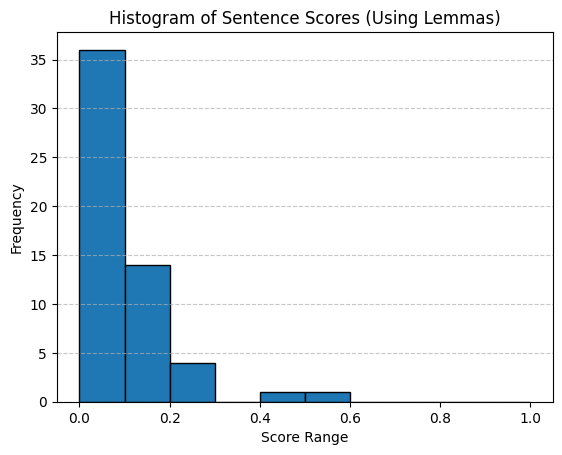

In [245]:

# Fetch the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    article_text = soup.find('article').get_text()
else:
    raise Exception(f"Failed to fetch the article: {response.status_code}")

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define scoring function for lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if len(lemmas) == 0:
        return 0.0
    return sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)

# Extract sentences and calculate scores
sentences = [sent.text for sent in nlp(article_text).sents]
interesting_lemmas = ["light", "laser", "system", "beam", "headlight"]  # Example lemmas from Q4
lemma_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram of lemma scores
plt.hist(lemma_scores, bins=np.arange(0, 1.1, 0.1), edgecolor="black")
plt.title("Histogram of Sentence Scores (Using Lemmas)")
plt.xlabel("Score Range")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment on the most common range of scores
# The most common range of scores appears to be around [0.0, 0.1] based on the histogram.

Question 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to consider nouns as interesting words, the following tokens and lemmas would be omitted from the lists generated in Questions 3 and 4:

Tokens and Lemmas That Might Be Omitted:
Tokens/Lemmas not considered nouns (e.g., verbs, adjectives, adverbs):
Tokens like "led" or "beam" might be considered adjectives or verbs in certain contexts.
Other non-noun tokens, such as auxiliary words or functional terms that were already filtered, would continue to be excluded.
How to Filter for Nouns:
To modify the code to only consider nouns, we can use the token.pos_ attribute in spaCy, which identifies the part of speech for each token. We can filter the tokens to include only those with pos_ equal to "NOUN".

In [246]:
# Filter tokens: Only consider nouns, and remove punctuation, stopwords, and whitespace
filtered_nouns = [token.text.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each noun
noun_freq = Counter(filtered_nouns)

# Get the 5 most common nouns
most_common_nouns = noun_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Nouns:")
for noun, freq in most_common_nouns:
    print(f"Noun: {noun}, Frequency: {freq}")

Top 5 Most Frequent Nouns:
Noun: laser, Frequency: 29
Noun: headlights, Frequency: 17
Noun: technology, Frequency: 10
Noun: headlight, Frequency: 9
Noun: beam, Frequency: 7


In [247]:
# Filter lemmas: Only consider nouns, and remove punctuation, stopwords, and whitespace
filtered_noun_lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each noun lemma
noun_lemma_freq = Counter(filtered_noun_lemmas)

# Get the 5 most common noun lemmas
most_common_noun_lemmas = noun_lemma_freq.most_common(5)

# Print the results
print("Top 5 Most Frequent Noun Lemmas:")
for lemma, freq in most_common_noun_lemmas:
    print(f"Noun Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Noun Lemmas:
Noun Lemma: laser, Frequency: 34
Noun Lemma: headlight, Frequency: 26
Noun Lemma: beam, Frequency: 12
Noun Lemma: technology, Frequency: 10
Noun Lemma: led, Frequency: 8
